In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten



C:\Users\Laxmana Rao\AppData\Roaming\Python\Python313\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
x_train = np.loadtxt('input.csv', delimiter=',')
y_train = np.loadtxt('labels.csv', delimiter=',') 


x_test = np.loadtxt('input_test.csv', delimiter=',')
y_test = np.loadtxt('labels_test.csv', delimiter=',')




In [3]:
x_train = x_train.reshape(len(x_train), 100, 100, 3)
y_train = y_train.reshape(len(y_train), 1)

x_test = x_test.reshape(len(x_test), 100, 100, 3) 
y_test = y_test.reshape(len(y_test), 1)

x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
print("shape of x_train:", x_train.shape)
print("shape of y_train:", y_train.shape)
print("shape of x_test:", x_test.shape)
print("shape of y_test:", y_test.shape)

shape of x_train: (2000, 100, 100, 3)
shape of y_train: (2000, 1)
shape of x_test: (400, 100, 100, 3)
shape of y_test: (400, 1)


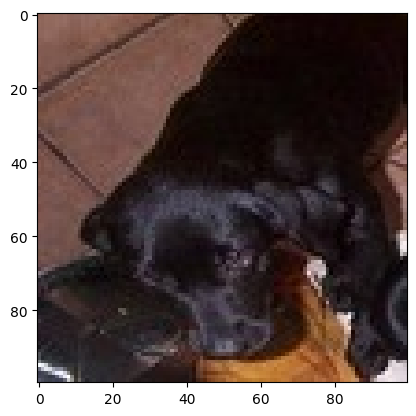

In [5]:
idx = random.randint(0, len(x_train))
plt.imshow(x_train[idx, :])
plt.show()

In [6]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)),
    MaxPooling2D((2,2)),

    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])

C:\Users\Laxmana Rao\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [8]:
model.fit(x_train,y_train,epochs=10,batch_size=64)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 123ms/step - accuracy: 0.5040 - loss: 0.7537
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - accuracy: 0.5380 - loss: 0.6867
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - accuracy: 0.6275 - loss: 0.6594
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - accuracy: 0.6720 - loss: 0.6160
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - accuracy: 0.7045 - loss: 0.5752
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - accuracy: 0.7585 - loss: 0.5103
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - accuracy: 0.7720 - loss: 0.4917
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 0.8215 - loss: 0.4127
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - accuracy: 0.8325 - loss: 0.3752
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.8665 - loss: 0.3163


In [9]:
model.evaluate(x_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6675 - loss: 0.6503


[0.6503042578697205, 0.6675000190734863]

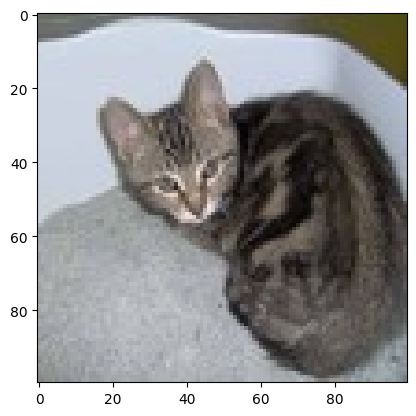

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Our model says it is a : dog


In [10]:
idx2 = random.randint(0, len(y_test))
plt.imshow(x_test[idx2, :])
plt.show()
y_pred = model.predict(x_test[idx2, :].reshape(1,100,100,3))
y_pred=y_pred>0.5
if(y_pred==0):
    pred='dog'
else:
    pred='cat'
print("Our model says it is a :",pred)
